In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2021-07-23 10:00:14.572855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-23 10:00:14.572953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


2021-07-23 10:00:15.124851: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-23 10:00:15.125096: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-07-23 10:00:15.234120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4906 - accuracy: 0.8804
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2338 - accuracy: 0.9337
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1849 - accuracy: 0.9472
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1557 - accuracy: 0.9552
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1355 - accuracy: 0.9610
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1201 - accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1080 - accuracy: 0.9694
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0974 - accuracy: 0.9717
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0883 - accuracy: 0.9751
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 

2021-07-23 10:01:50.560972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.1091 - accuracy: 0.9684
test_loss: 0.10905203223228455 
test_accuracy: 0.9684000611305237


In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [16]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
a1[0]

array([ 0.58205931,  0.04551326, -0.49486035, -1.24607984,  0.55335383,
       -1.43058759,  0.47446024,  1.14802849,  0.46425613,  1.61989731,
       -1.20702241, -0.10510935,  1.14059931, -0.59995111,  1.64364685,
        1.58223094,  1.80569403,  0.17278563,  0.50814824, -0.7554197 ,
       -0.84365853,  0.35564361,  0.20171975,  1.08959124,  0.34168312,
       -0.3506312 ,  0.21768778,  1.75960041, -0.79483223,  0.29825145,
        0.67166858,  0.64535844, -0.14783461,  0.07427627,  0.00408056,
       -0.33332487,  0.78347323,  0.59021497, -1.9273904 , -0.76164203,
       -1.51750555,  0.177876  ,  0.10493663,  0.81419395, -0.14250029,
        0.35131884,  0.21909258, -0.17389325, -0.4199727 ,  0.79392825])

In [17]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.64154112 0.51137635 0.37874926 0.22337948 0.63491335 0.19300715
 0.61643889 0.75915063 0.61402336 0.83478097 0.23022832 0.47374683
 0.75778966 0.35435488 0.83803055 0.82952024 0.85884065 0.54308926
 0.62437228 0.31964152 0.30076481 0.58798547 0.55025963 0.74830474
 0.58459932 0.41322937 0.55420805 0.85315961 0.31113204 0.57401501
 0.66187668 0.65596374 0.46310851 0.51856054 0.50102014 0.41743185
 0.68642819 0.64341447 0.1270397  0.31828987 0.17982913 0.54435212
 0.52621011 0.69300249 0.46443509 0.58693736 0.55455509 0.45663591
 0.39652328 0.68867418]


In [18]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [19]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.07665407  0.18348117 -0.16239049 -0.05045492 -0.27293644  0.12623493
  0.98149438  0.19822547  0.22364095  0.24666303]


In [20]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [21]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.08710021, 0.09692005, 0.06858095, 0.07670373, 0.06140362,
       0.09152757, 0.21527142, 0.09835966, 0.10089155, 0.10324123])

In [48]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [23]:
print(y_hat[0])
print(t[0])

[0.08710021 0.09692005 0.06858095 0.07670373 0.06140362 0.09152757
 0.21527142 0.09835966 0.10089155 0.10324123]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.3813158290303207

In [26]:
'''
경사하강법
'''
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01742004,  0.01938401,  0.01371619,  0.01534075,  0.01228072,
        -0.18169449,  0.04305428,  0.01967193,  0.02017831,  0.02064825],
       [-0.17963695,  0.01990001,  0.0154225 ,  0.01931266,  0.01709166,
         0.01690983,  0.03518589,  0.01615556,  0.01967457,  0.0199843 ],
       [ 0.02375853,  0.02151285,  0.01303741,  0.01966324, -0.1836551 ,
         0.0205427 ,  0.03009203,  0.0183117 ,  0.022164  ,  0.01457266],
       [ 0.01991048, -0.18238578,  0.01436757,  0.01622321,  0.01374217,
         0.01803103,  0.0382781 ,  0.01774806,  0.02321718,  0.02086799],
       [ 0.02082168,  0.0195159 ,  0.01492588,  0.01703127,  0.01929096,
         0.01764525,  0.03272891,  0.01898733,  0.01893791, -0.17988509]])

In [27]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.05547989, -0.08690575,  0.03579109,  0.04381382, -0.05703792,
        -0.03459024,  0.08972725,  0.04504527,  0.05266144, -0.03302507],
       [-0.0807711 , -0.10997398,  0.04840065,  0.05874406, -0.05404059,
        -0.05083335,  0.1211521 ,  0.06068833,  0.07041865, -0.06378477],
       [-0.05622346, -0.08443002,  0.03787026,  0.04614903, -0.05361352,
        -0.05338122,  0.09570127,  0.04785656,  0.05556886, -0.03549776],
       [-0.0570634 , -0.05992984,  0.04409613,  0.05324655, -0.04341875,
        -0.07057571,  0.11044607,  0.0559114 ,  0.06333984, -0.09605229],
       [ 0.00714687, -0.08506666,  0.02573455,  0.03136672, -0.05356046,
        -0.03319431,  0.06565917,  0.03334239,  0.03888485, -0.03031311],
       [-0.03402175, -0.03045204,  0.02466507,  0.03029682, -0.04362259,
        -0.02755867,  0.06110193,  0.03127456,  0.0357543 , -0.04743764],
       [-0.04370329, -0.07396723,  0.0279142 ,  0.03401165, -0.0406575 ,
        -0.05397402,  0.07192107,  0.03537575

In [29]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [30]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [31]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [33]:
# 파라미터를 업데이트하는 함수
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

In [34]:
'''
오차역전파법
'''
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [35]:
'''
모델 학습 Step-by-Step
'''
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.23096111 0.08926441 0.05682361 0.05002748 0.0686314  0.21097563
  0.07400901 0.08423817 0.05304904 0.08202014]
 [0.21029547 0.09518633 0.05600391 0.04935998 0.0682373  0.22700421
  0.05939161 0.0947923  0.0550722  0.08465669]
 [0.18589278 0.08602904 0.0482602  0.05535509 0.07095098 0.23182548
  0.08024979 0.0979526  0.05366186 0.08982217]
 [0.18034763 0.10710158 0.05691056 0.06632518 0.06830778 0.20096195
  0.06442691 0.10248088 0.05659329 0.09654424]
 [0.21623967 0.08146966 0.05379617 0.05976969 0.07811718 0.20523702
  0.07188835 0.08184586 0.05441119 0.09722521]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.0651446407195797


In [36]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [37]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.09283317 0.17938668 0.0942933  0.04369707 0.03054785 0.06774566
  0.08436713 0.1793807  0.03032019 0.19742825]
 [0.12795625 0.14856437 0.10748518 0.06108304 0.03474451 0.06704314
  0.09294293 0.16565492 0.03254551 0.16198016]
 [0.11391077 0.16257678 0.09366585 0.05094903 0.0345828  0.06277188
  0.09558523 0.18232167 0.03300984 0.17062616]
 [0.12113106 0.15779197 0.09461613 0.06126691 0.02745252 0.05287895
  0.09776041 0.18082499 0.03766277 0.16861428]
 [0.11810527 0.15567734 0.09603288 0.05257993 0.04037617 0.05656043
  0.09139171 0.16682151 0.02916042 0.19329434]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3204959261951834
---------
[[0.10816406 0.19218685 0.08164725 0.04112389 0.04060001 0.09054631
  0.07381345 0.13581282 0.02946345 0.20664191]
 [0.15553219 0.15833431 0.0927646  0.05727494 0.04528469 0.0846845
  0.08092319 0.12529573 0.0314

In [42]:
'''
추론 과정 구현과 정확도(Accuracy) 계산
'''
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [43]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.13299462, 0.1921921 , 0.04770097, 0.02876078, 0.08547816,
       0.1848205 , 0.0443306 , 0.06433583, 0.02247363, 0.19691281])

In [44]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [49]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.13299462 0.1921921  0.04770097 0.02876078 0.08547816 0.1848205
 0.0443306  0.06433583 0.02247363 0.19691281]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.1


In [51]:
'''
전체 학습 사이클 수행
'''
# 학습시키는 파라미터 초기화하는 함수
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [52]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.2993903061860212
train acc, test acc | 0.1561, 0.1576
Loss:  0.8359993408706857
train acc, test acc | 0.7835333333333333, 0.7902
Loss:  0.5415375405526841
train acc, test acc | 0.8783666666666666, 0.8821
Loss:  0.4077779026972382
train acc, test acc | 0.8967, 0.9008
Loss:  0.4365387936568182
train acc, test acc | 0.9075, 0.9084
Loss:  0.18857525581182258
train acc, test acc | 0.9151, 0.9177
Loss:  0.3000361496677754
train acc, test acc | 0.9198166666666666, 0.9232
Loss:  0.20440939400338215
train acc, test acc | 0.9242333333333334, 0.9265
Loss:  0.19285016753102863
train acc, test acc | 0.9286666666666666, 0.9299
Loss:  0.21128538809692834
train acc, test acc | 0.93195, 0.9348
Loss:  0.2246974072401164
train acc, test acc | 0.93385, 0.935
Loss:  0.21655342714031206
train acc, test acc | 0.9369166666666666, 0.9379
Loss:  0.14068216649553636
train acc, test acc | 0.9399166666666666, 0.9409
Loss:  0.21848044411446074
train acc, test acc | 0.94173333

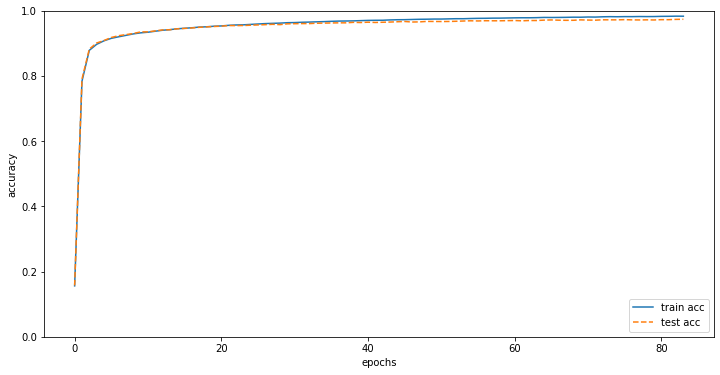

In [54]:
'''
훈련 과정 Accuracy, Loss 변화를 시각화
'''
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

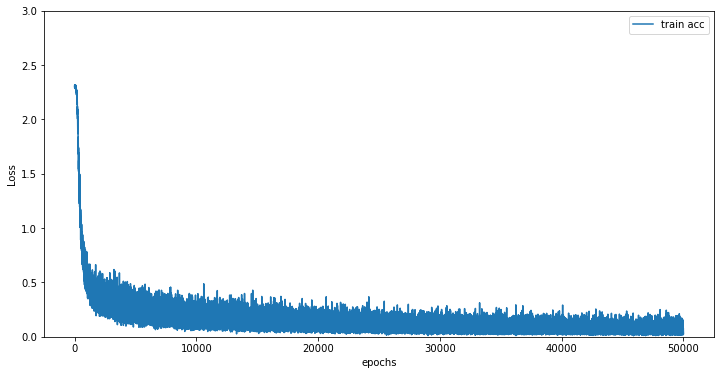

In [55]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()